# Gold Price Prediction Using Machine Learning

This Notebook deals with prediction of gold prices. The data contains features regarding the Gold Price Data.

## Objectives

* The main goal of this notebook is to build a machine learning system that can predict GLD (gold) prices based on several other stock prices.
* Obtain data insights using pandas.
* Find the correlation of the other features with GLD (gold) stock price.
* Predict the GLD (gold) price by splitting the data and evaluate the model.

## ABOUT THE DATA

* **Data Overview:** This data file is a Comma separated value(CSV) file format with 2290 rows and 7 columns. It contains 5 columns which are numerical in datatype and one column in Date format. Clearly, the data shows the value of the variables SPX, GLD, USO, SLV, EUR/USD against the dates in the date column.
* Data Source: [Link](https://www.kaggle.com/altruistdelhite04/gold-price-data)
* Data type available: .csv

In [3]:
# Import required libraries
import pandas as pd                                          #Load data & perform basic operations
import numpy as np                                           #Numpy Arrays
import matplotlib.pyplot as plt                              #Matplotlib is a low level graph plotting library in python that serves as a visualization utility.
import seaborn as sns                                        #Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.
from sklearn.model_selection import train_test_split         #Use to split the original data into training data & test data
from sklearn.ensemble import RandomForestRegressor           #Import Random Forest Regression Model
from sklearn import metrics                                  #Useful for finding performance of model

1. Data Collection & processing

In [4]:
# Loading the gold_price_data.csv data
gold_price = pd.read_csv("/content/gld_price_data.csv")

In [5]:
# View top 5 & last 5 rows
gold_price

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


 Data consists of various GLD (gold) prices for several days in the period of 10 years [Date- MM/DD/YYYY].

* **SPX -** The Standard and Poor's 500, or simply the S&P 500, is a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States.
* **GLD -** SPDR Gold Shares is part of the SPDR family of exchange-traded funds (ETF) managed and marketed by State Street Global Advisors.
* **USO -** The United States Oil Fund ® LP (USO) is an exchange-traded security whose shares may be purchased and sold on the NYSE Arca.
* **SLV -** The iShares Silver Trust (SLV) is an exchange traded fund (ETF) that tracks the price performance of the underlying holdings in the LMBA Silver Price.
* **EUR/USD -** The Currency Pair EUR/USD is the shortened term for the euro against U.S. dollar pair, or cross for the currencies of the European Union (EU) and the United States (USD). The value of the EUR/USD pair is quoted as 1 euro per x U.S. dollars. For example, if the pair is trading at 1.50, it means it takes 1.5 U.S. dollars to buy 1 euro.

In [6]:
# Number of rows & columns
gold_price.shape

(2290, 6)

In [7]:
# Getting some basic info
gold_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# Checking number of missing values
gold_price.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Data does not contain any missing values

In [9]:
# Getting statistical measures of the data
gold_price.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


2. Correlation:

* **Positive Correlation -** Are cases, if 1 value increases other value also increases. A correlation of *1.0 indicates a perfect positive correlation.*
* **Negative Correlation -** Are cases, if 1 value increases other value decreases. A correlation of *-1.0 indicates a perfect negative correlation.*
* **Zero Correlation -** A value of *zero indicates that there is no relationship between the two variables.*

In [10]:
correlation = gold_price.corr()

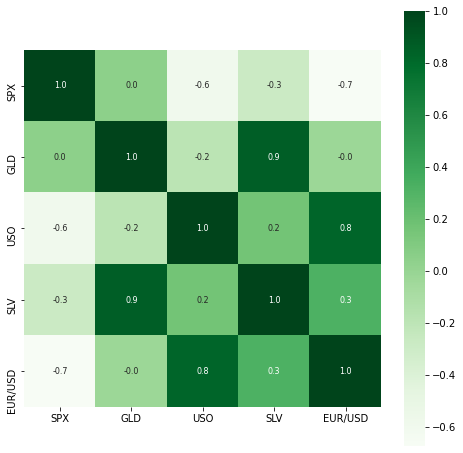

In [11]:
#Constructing a heatmap to understand the values
plt.figure(figsize = (8, 8))  
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={'size' : 8}, cmap="Greens")

Conclusion:

* Gold (GLD) and silver (SLV) are highly corelated to each other -> 0.9
* Gold (GLD) and Standard and Poor's 500 (SPX) are zero correlation -> 0.0
* Rest features expect gold (GLD) are negative correlated with respect to gold (GLD) -> -0.0 & -0.2

In [12]:
# Correlation values of GLD (gold)
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


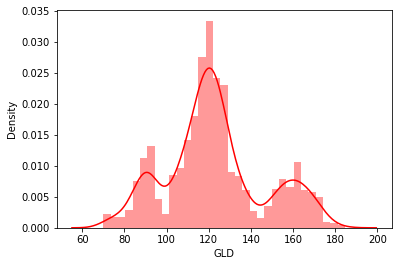

In [13]:
#  Checking the distribution of GLD price
sns.distplot(gold_price["GLD"], hist=True, kde=True, color="Red")

From Distribution Plot, I conclude that most of the values lie in the range of 120, and less values lie in 90 and 180 & bump in 100 and near 140.

3. Splitting the Features and Target

* Traget - GLD (gold) price stock

* Features - Other stocks

In [14]:
# axis = 1 (Columns)
# axis = 0 (Rows)
X = gold_price.drop(["Date", "GLD"], axis = 1)
Y = gold_price["GLD"]

In [15]:
print(X, "Remove two columns-> Date & GLD")

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns] Remove two columns-> Date & GLD


In [16]:
print(Y, "Y contains GLD prices")

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64 Y contains GLD prices


Use other 4 stocks (SPX, USO, SLV, EUR/USD) to predict (GLD) gold price

Spliting The Data Into Training Data & Test Data 

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

Model Training: Random Forest Regressor

* Random forest is an ensemble of decision trees. This is to say that many trees, constructed in a certain “random” way form a Random Forest. 
* Each tree is created from a different sample of rows and at each node, a different sample of features is selected for splitting. 
* Each of the trees makes its own individual prediction. 
* These predictions are then averaged to produce a single result.

In [18]:
regressor = RandomForestRegressor(n_estimators=100)       #default no.

In [19]:
# Training the model
# .fit function used to fit our data to this regressive model
regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Now, The Random Forest Regression Model is trained, and I use this trained model to make some predictions.

4. Model Evaluation

In [20]:
# Prediction on test data
text_data_prediction = regressor.predict(X_test)

In [21]:
text_data_prediction

array([168.46619908,  82.23389983, 116.18470021, 127.6115012 ,
       120.71460099, 154.78079784, 150.33589912, 126.00850066,
       117.48129879, 126.04110061, 116.6537011 , 171.59720028,
       141.93779847, 167.89709866, 115.15080018, 117.53160043,
       140.09980271, 170.29810139, 159.95070262, 160.22240013,
       155.13540034, 125.54380021, 176.07089975, 157.69620364,
       125.22750043,  93.68129929,  77.87940001, 120.39480026,
       119.05039911, 167.50869983,  88.30780068, 125.20519994,
        91.128301  , 117.6705004 , 121.20009917, 136.1740012 ,
       115.61780142, 115.40210052, 147.83340008, 107.23250106,
       104.17730234,  87.29569818, 126.52920024, 118.01220013,
       154.5154991 , 119.48520005, 108.31790005, 108.23079829,
        93.14470027, 127.0732981 ,  74.68250035, 113.61429887,
       121.4016999 , 111.15899924, 118.937399  , 120.63829923,
       160.15970007, 168.38030118, 146.84689634,  86.10739869,
        94.42010045,  86.82599875,  90.46650002, 119.02

In [22]:
# R-squared is a statistical measure of how close the data are to the fitted regression line.
error_score = metrics.r2_score(Y_test, text_data_prediction)
print("R scored error : ", error_score)

R scored error :  0.9889171379556846


Compare the Actual Values & Predicted Values in a Plot

In [23]:
Y_test = list(Y_test)

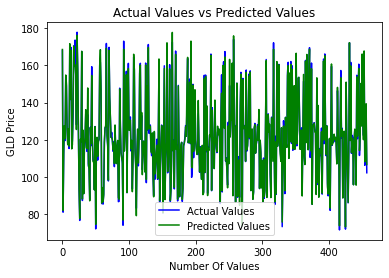

In [24]:
plt.plot(Y_test, color = 'Blue', label = "Actual Values")                                   #Real Values
plt.plot(text_data_prediction, color = 'Green', label = "Predicted Values")                 #Predicted Values
plt.title("Actual Values vs Predicted Values")
plt.xlabel("Number Of Values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()

* R scored error: 0.98, which is very good.
* As I compare actual values and predicted values are very close to each other.